#### Importando as bibliotecas

In [1]:
import pandas as pd
import sqlalchemy as sqla
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Consulta no banco

In [2]:
# query para consulta no banco
query = """
    SELECT
	SalesKey
	,YEAR(DateKey) AS SaleYear
	,DATENAME(MONTH, DateKey) AS SaleMonth
	,DAY(DateKey) as SaleDay
	,CAST(DateKey AS DATE) AS SaleDate
	,e.ChannelName
	,c.SalesTerritoryCountry
	,c.SalesTerritoryRegion
	,c.SalesTerritoryName
	,d.CityName
	,b.StoreType
	,b.StoreName
	,h.ProductCategoryName
	,g.ProductSubcategoryName
	,f.ClassName
	,f.BrandName
	,f.ProductName
	,TotalCost
	,SalesQuantity
	,SalesAmount
	,DiscountQuantity
	,DiscountAmount
	,ReturnQuantity
	,ReturnAmount	
FROM
	FactSales a
LEFT JOIN DimStore b
	ON a.StoreKey = b.StoreKey
LEFT JOIN DimSalesTerritory c
	ON b.GeographyKey = c.GeographyKey
LEFT JOIN DimGeography d
	ON b.GeographyKey = d.GeographyKey
LEFT JOIN DimChannel e
	ON a.channelKey = e.ChannelKey
LEFT JOIN DimProduct f
	ON a.ProductKey = f.ProductKey
LEFT JOIN DimProductSubcategory g
	ON f.ProductSubcategoryKey = g.ProductSubcategoryKey
LEFT JOIN DimProductCategory h
	ON g.ProductCategoryKey = h.ProductCategoryKey
    """

In [3]:
# instanciando a conexão
servidor = 'localhost'
banco_de_dados = 'ContosoRetailDW'
driver = 'ODBC Driver 17 for SQL Server'

conexao_str = f'mssql+pyodbc://{servidor}/{banco_de_dados}?driver={driver}&trusted_connection=yes'

engine = sqla.create_engine(conexao_str)

In [4]:
# consultando o banco
dados = pd.read_sql_query(query, engine)

#### Análise exploratória de dados

In [5]:
dados.head(2)

,SalesKey,SaleYear,SaleMonth,SaleDay,SaleDate,ChannelName,SalesTerritoryCountry,SalesTerritoryRegion,SalesTerritoryName,CityName,...,ClassName,BrandName,ProductName,TotalCost,SalesQuantity,SalesAmount,DiscountQuantity,DiscountAmount,ReturnQuantity,ReturnAmount
0,1,2007,Janeiro,2,2007-01-02,Store,UK,England,Baildon,Baildon,...,Regular,A. Datum,A. Datum Point Shoot Digital Camera M500 Black,728.4,8,1544.400,1,39.600,0,0.0
1,2,2007,Fevereiro,12,2007-02-12,Reseller,United States,Washington,Seattle,Seattle,...,Economy,Contoso,Contoso Battery charger - bike E200 Black,40.6,4,78.605,1,0.995,0,0.0


In [6]:
print(f'Número de linhas: {dados.shape[0]:,}')
print(f'Número de colunas: {dados.shape[1]}')

Número de linhas: 3,406,089
Número de colunas: 24


In [7]:
dados.isnull().sum()

SalesKey                  0
SaleYear                  0
SaleMonth                 0
SaleDay                   0
SaleDate                  0
ChannelName               0
SalesTerritoryCountry     0
SalesTerritoryRegion      0
SalesTerritoryName        0
CityName                  0
StoreType                 0
StoreName                 0
ProductCategoryName       0
ProductSubcategoryName    0
ClassName                 0
BrandName                 0
ProductName               0
TotalCost                 0
SalesQuantity             0
SalesAmount               0
DiscountQuantity          0
DiscountAmount            0
ReturnQuantity            0
ReturnAmount              0
dtype: int64

In [8]:
dados.duplicated().sum()

0

In [9]:
dados.head(2)

,SalesKey,SaleYear,SaleMonth,SaleDay,SaleDate,ChannelName,SalesTerritoryCountry,SalesTerritoryRegion,SalesTerritoryName,CityName,...,ClassName,BrandName,ProductName,TotalCost,SalesQuantity,SalesAmount,DiscountQuantity,DiscountAmount,ReturnQuantity,ReturnAmount
0,1,2007,Janeiro,2,2007-01-02,Store,UK,England,Baildon,Baildon,...,Regular,A. Datum,A. Datum Point Shoot Digital Camera M500 Black,728.4,8,1544.400,1,39.600,0,0.0
1,2,2007,Fevereiro,12,2007-02-12,Reseller,United States,Washington,Seattle,Seattle,...,Economy,Contoso,Contoso Battery charger - bike E200 Black,40.6,4,78.605,1,0.995,0,0.0


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406089 entries, 0 to 3406088
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SalesKey                int64  
 1   SaleYear                int64  
 2   SaleMonth               object 
 3   SaleDay                 int64  
 4   SaleDate                object 
 5   ChannelName             object 
 6   SalesTerritoryCountry   object 
 7   SalesTerritoryRegion    object 
 8   SalesTerritoryName      object 
 9   CityName                object 
 10  StoreType               object 
 11  StoreName               object 
 12  ProductCategoryName     object 
 13  ProductSubcategoryName  object 
 14  ClassName               object 
 15  BrandName               object 
 16  ProductName             object 
 17  TotalCost               float64
 18  SalesQuantity           int64  
 19  SalesAmount             float64
 20  DiscountQuantity        int64  
 21  DiscountAmount          float64

In [11]:
# alterando tipo de dados
dados['SaleDate'] = pd.to_datetime(dados['SaleDate'])

##### Analise de venda valor

In [12]:
# dados.groupby('SaleDate').agg({'SalesAmount':'sum'}).style.format({'SalesAmount': '{:,.2f}'})

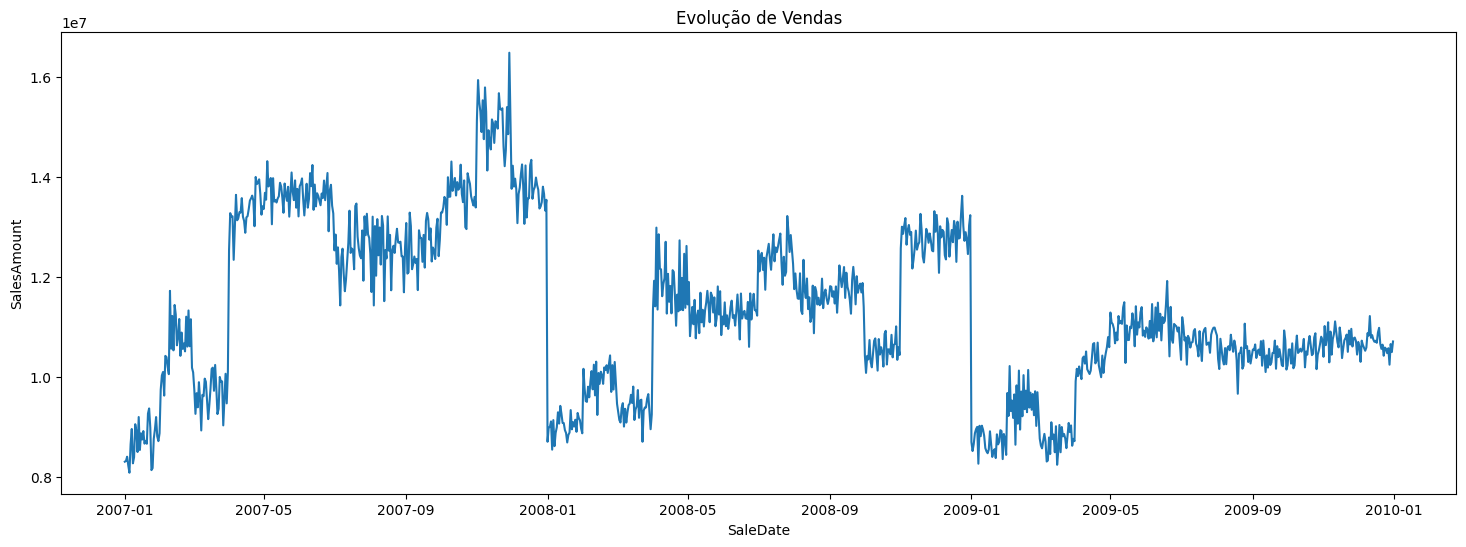

In [13]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title('Evolução de Vendas')

ax = sns.lineplot(
                data=dados.groupby('SaleDate').agg({'SalesAmount':'sum'}),
                x='SaleDate',
                y='SalesAmount',
                ax=ax)

plt.show()

* Pico de vendas foi em 2007
* Tendencia de queda das vendas entre Janeiro e Maio
* Em 2010 a venda durante o ano cai entre Junho e Dezembro, diferente dos dois anos anteriores que tem um aumento em Dezembro

In [17]:
# funcao para plotar grafico de barras
def plot_bar_chart(data, x, y):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title(f'{y} por {x}')

    ax = sns.barplot(
                    data=data.groupby(x).agg({y:'sum'}).sort_values(by=y, ascending=False).head(10).reset_index(),
                    x=x,
                    y=y,
                    ax=ax)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.show()

In [15]:
x_columns = ['SaleYear', 'SalesTerritoryCountry', 'ChannelName', 'StoreName', 'ProductCategoryName', 'ProductSubcategoryName', 'BrandName', 'ClassName', 'ProductName']
y_columns = ['SalesAmount', 'SalesQuantity']

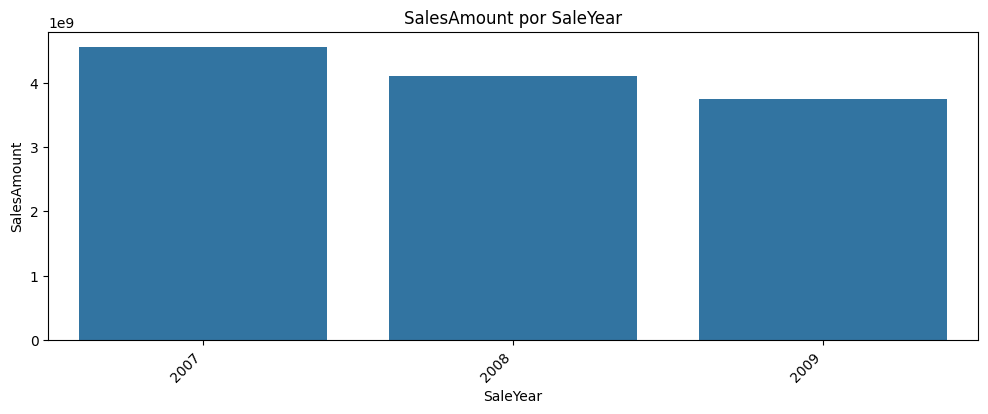

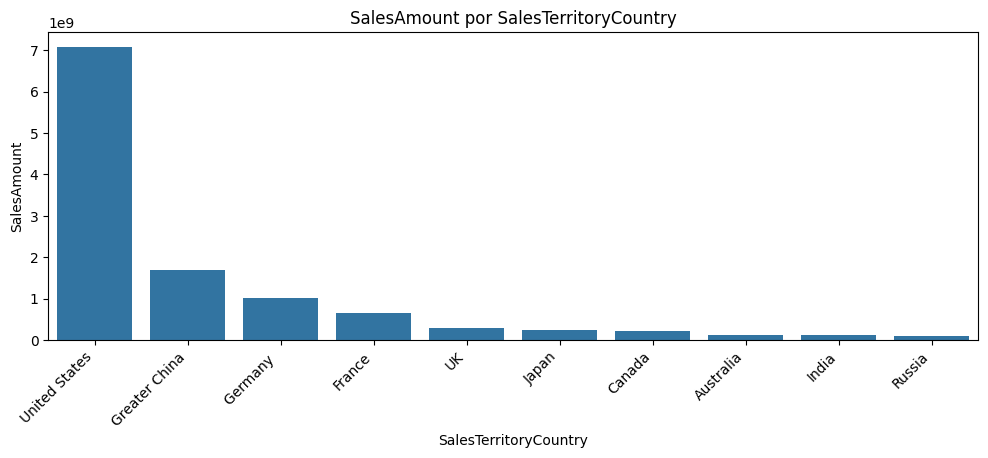

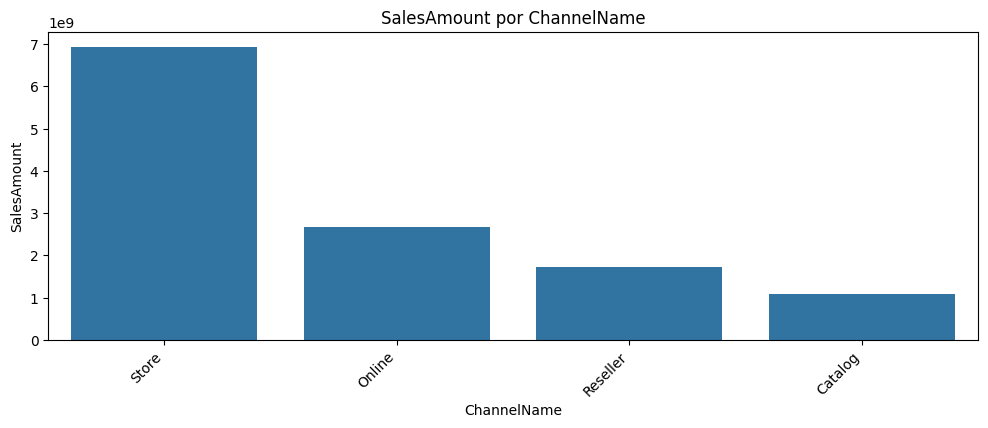

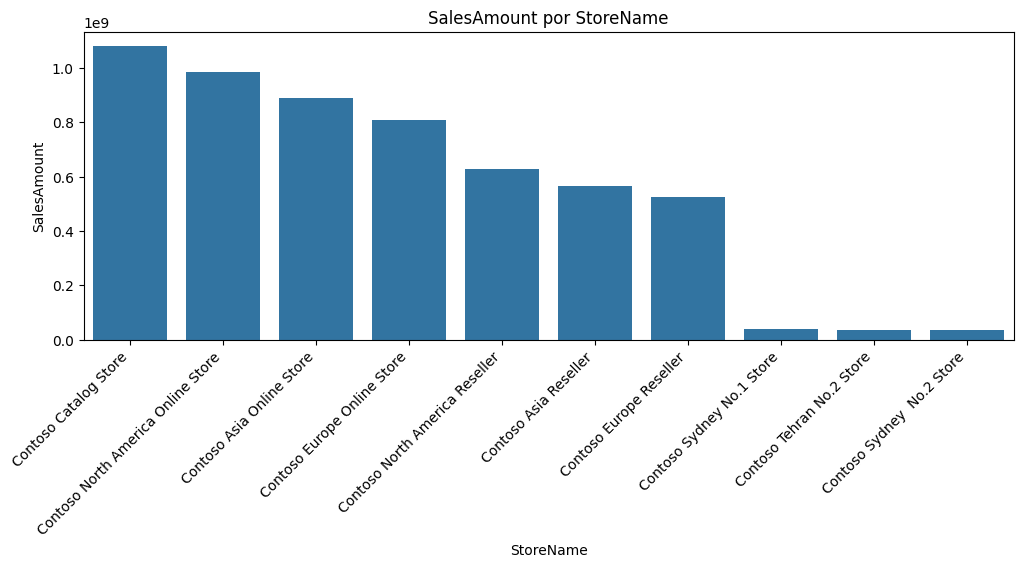

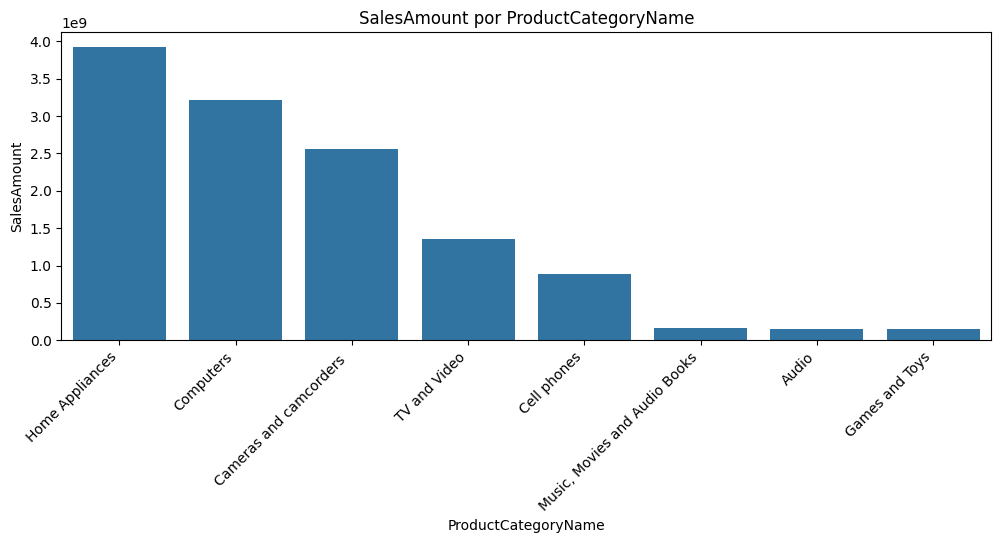

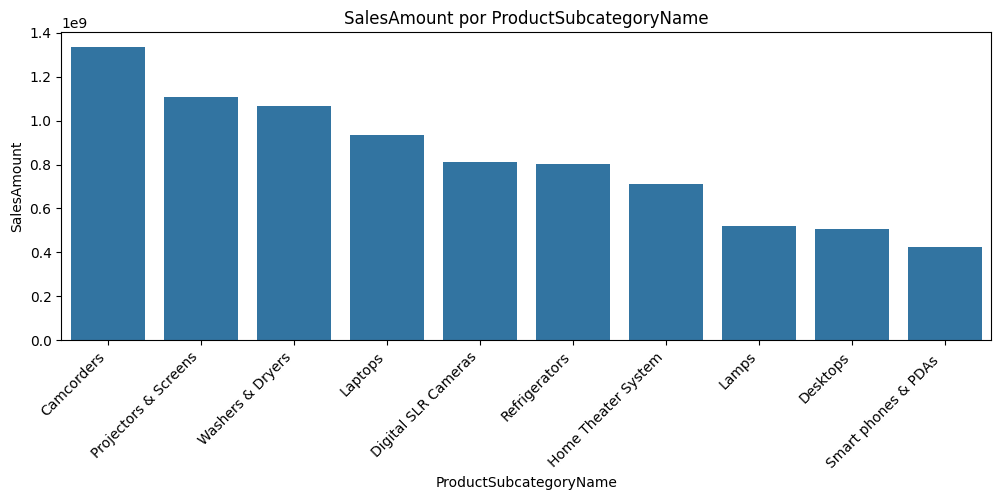

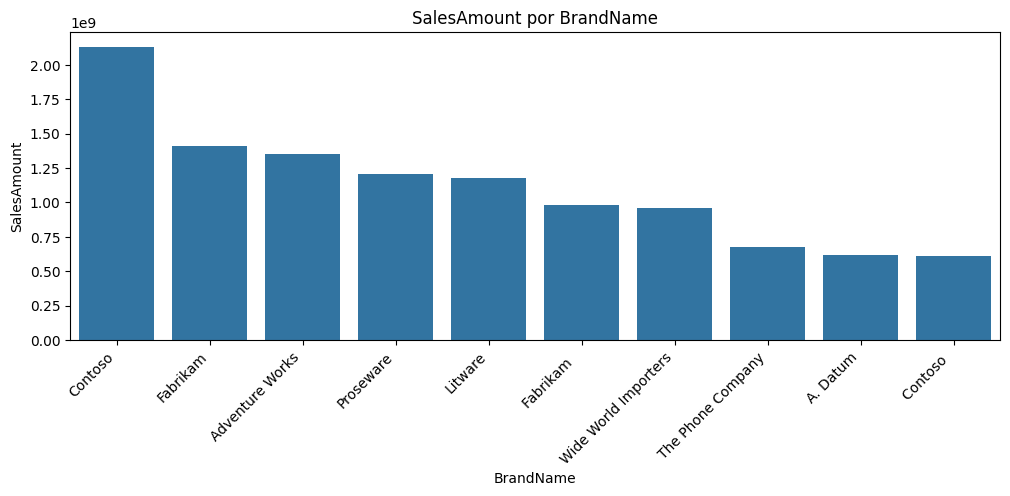

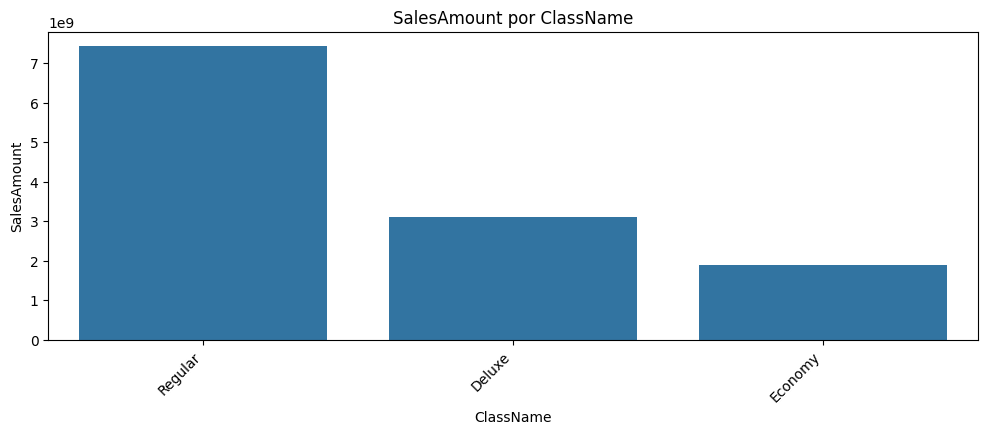

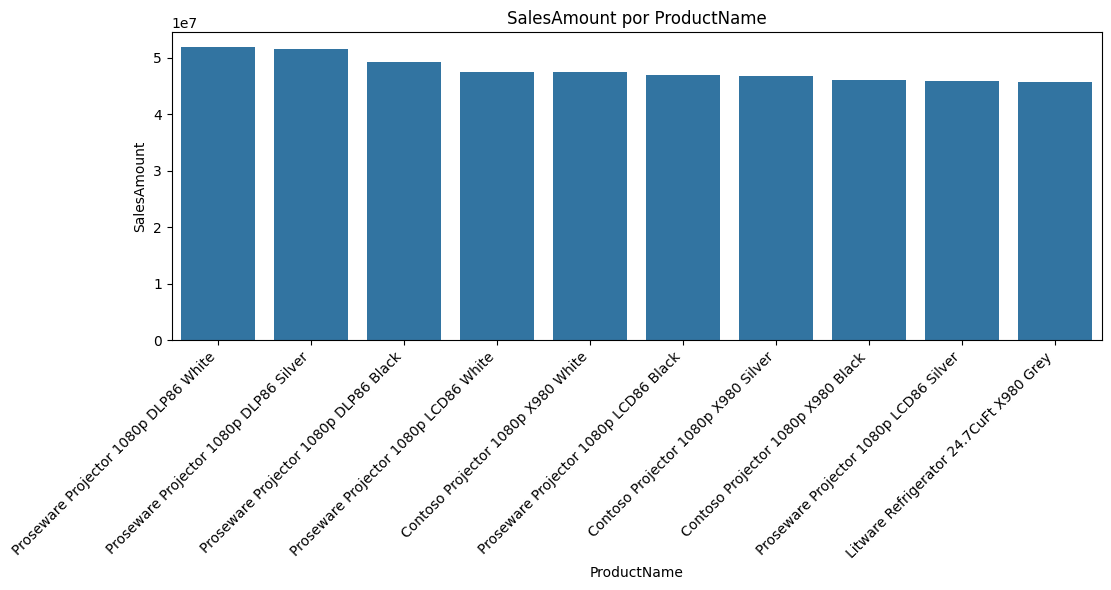

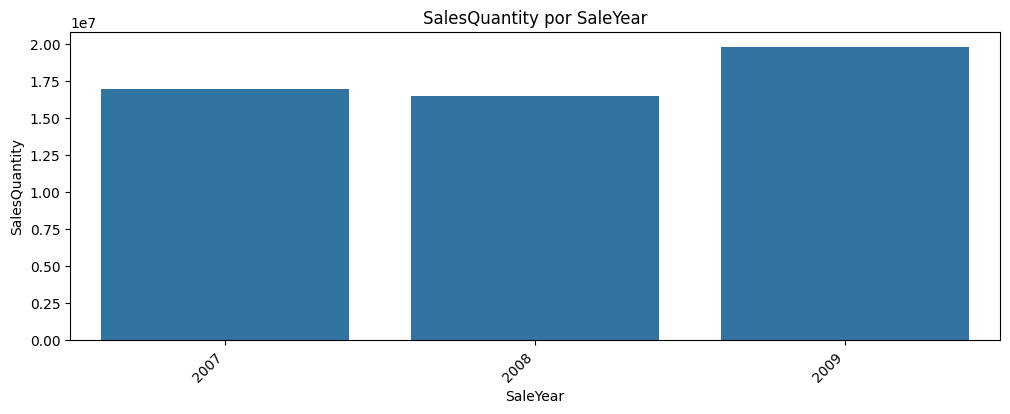

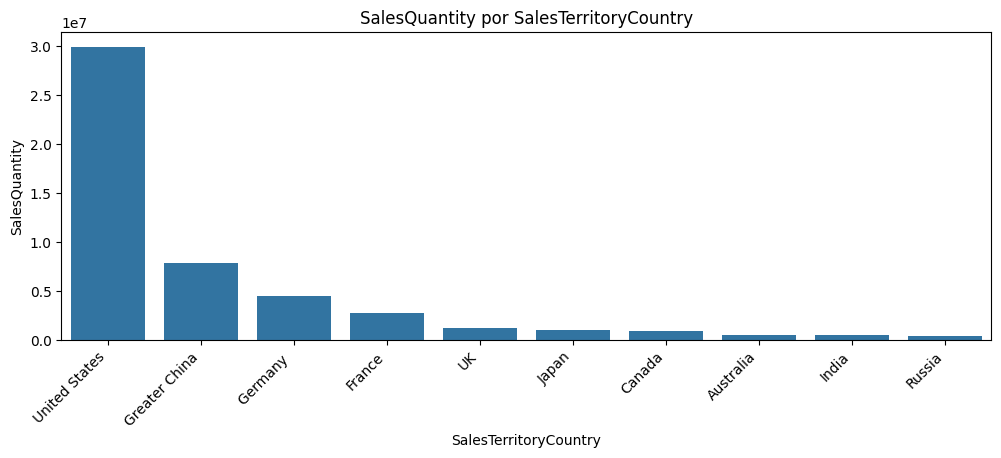

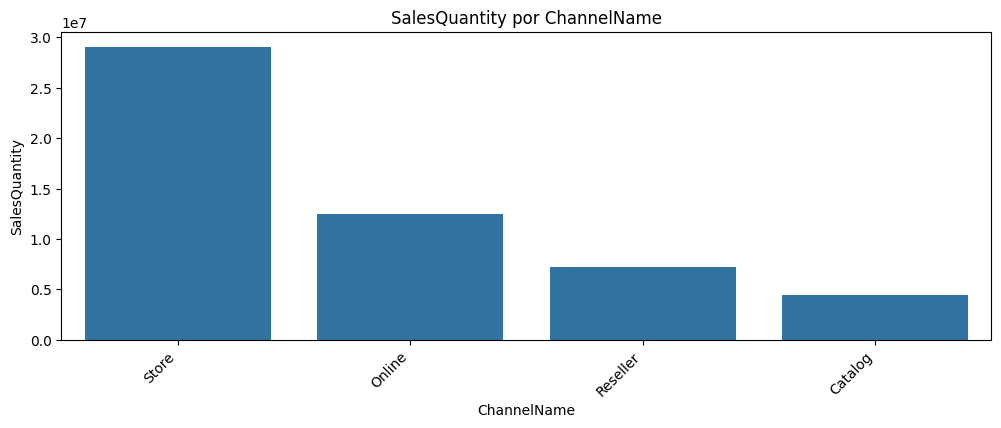

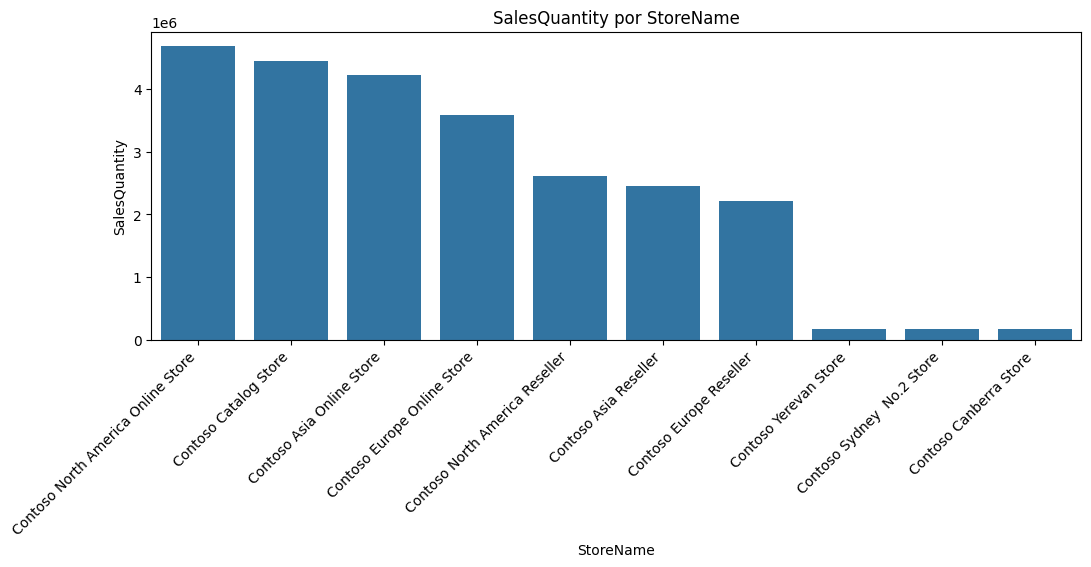

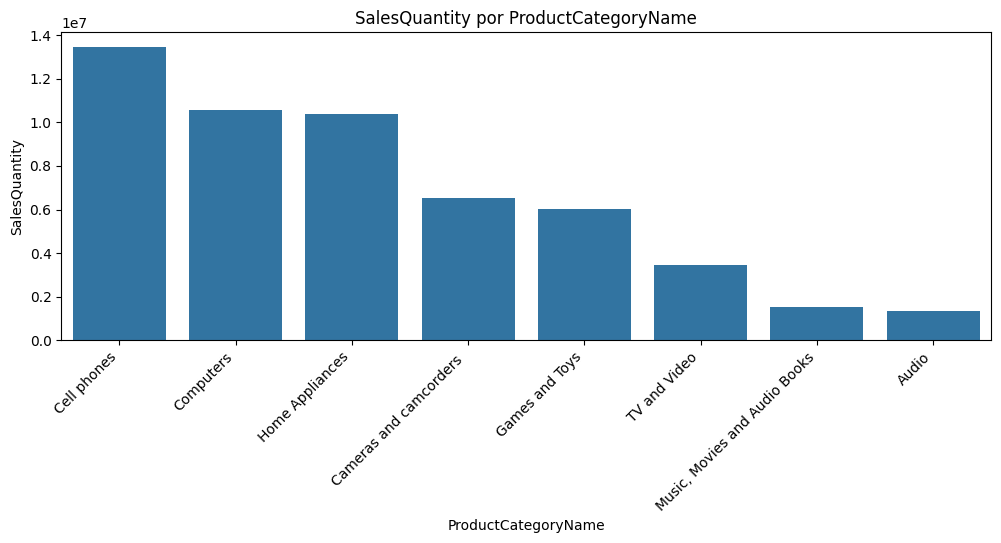

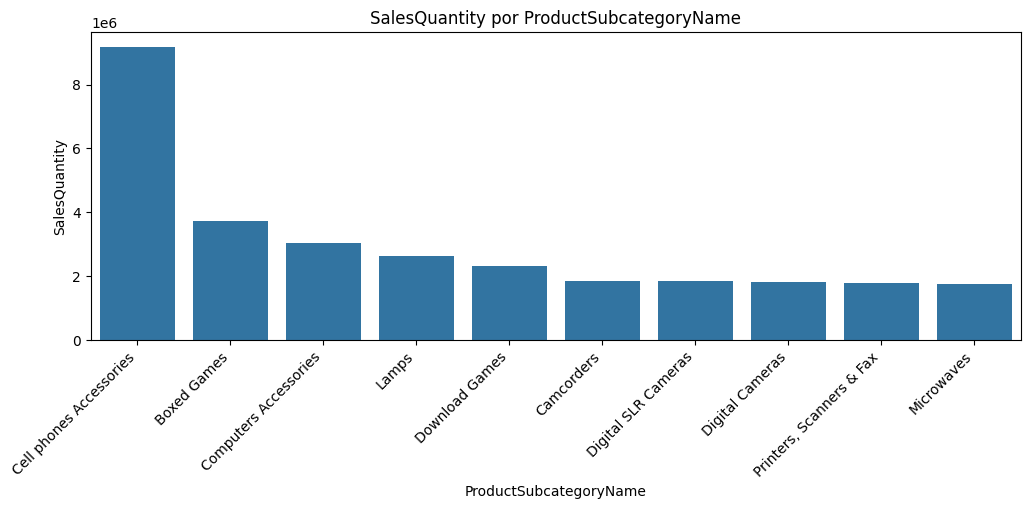

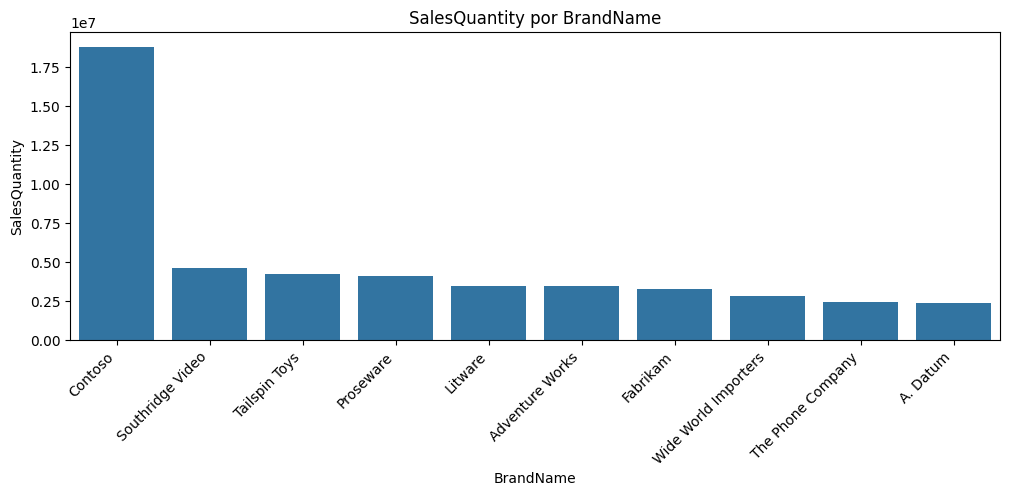

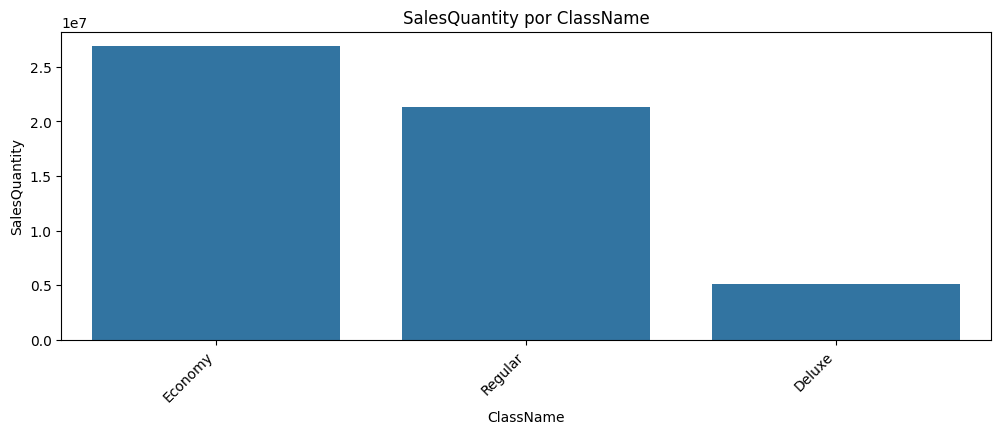

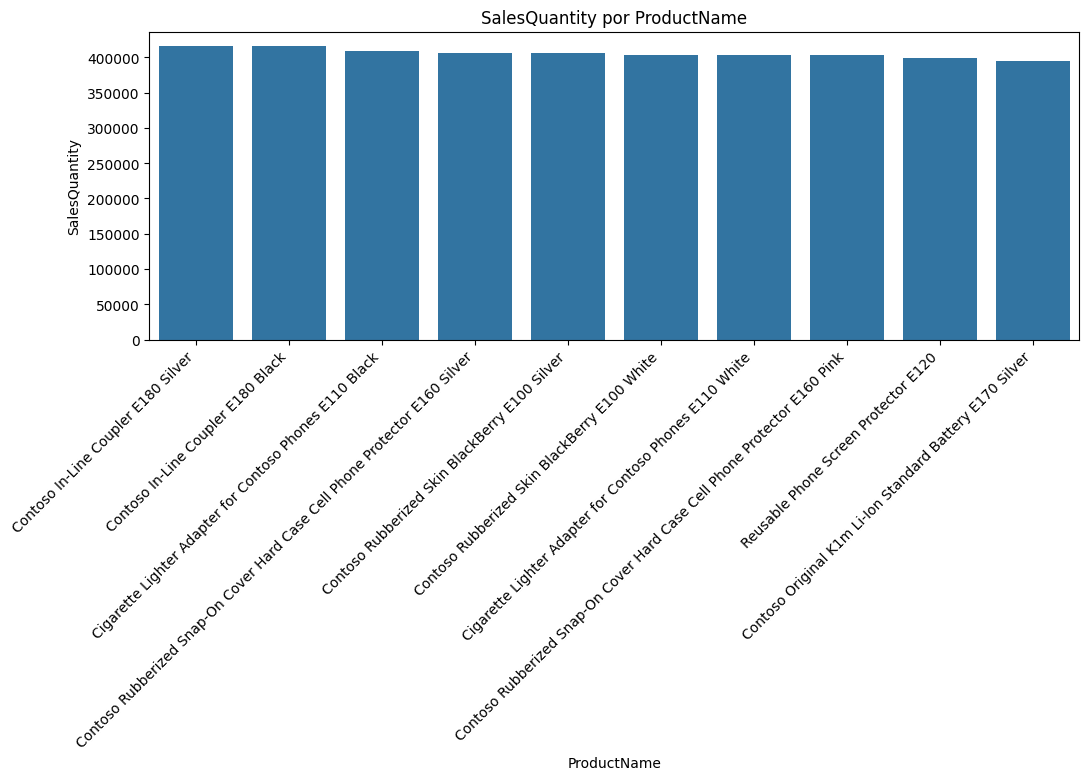

In [18]:
for y in y_columns:
    for x in x_columns:
        plot_bar_chart(dados, x, y)

- O ano com maior montante de vendas em valor foi 2007
- EUA lidera o montante de vendas
- O canal com maior valor em vendas foi Store
- Entre as 10 primeiras lojas em vendas estão lojas da Europa, América do Norte e Ásia
- As marcas com maiores valores em venda foram Contoso, Fabrikam, Adventure Works e Proseware
- Produtos de classe regular lideram as vendas
- Apesar de 2007 ter o maior montante em vendas, foi 2009 que ficou na frente em vendas em quantidade, o que pode indicar: baixa nos preços, mudança de posicionamento da empresa ou produto, vender mais produtos com preço de venda melhor ou novas concorrências com mesma qualidade e preço menores

##### Comparação entre valores

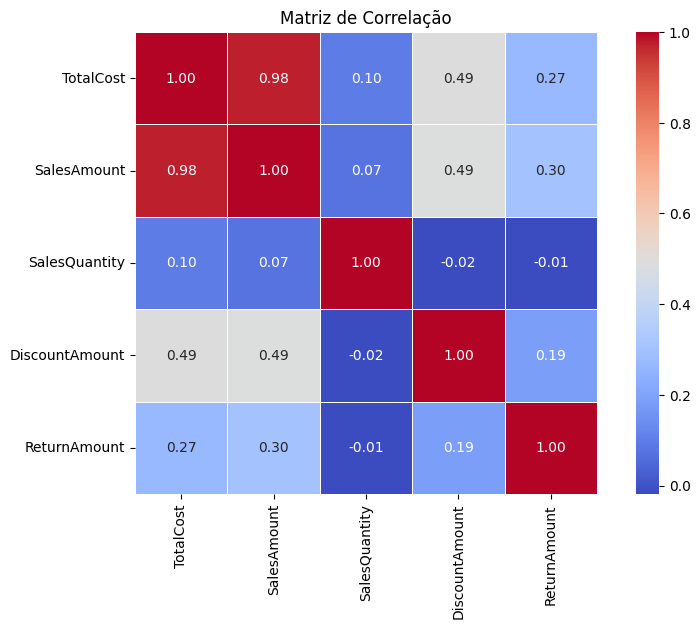

In [26]:
correlation_matrix = dados[['TotalCost', 'SalesAmount', 'SalesQuantity', 'DiscountAmount', 'ReturnAmount']].corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Matriz de Correlação')

ax = sns.heatmap(
            correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=0.5
        )

plt.show()

A única correlação forte esta em custo e valor vendido, o que faz sentido e mostra que a empresa repassa os custos que recebe

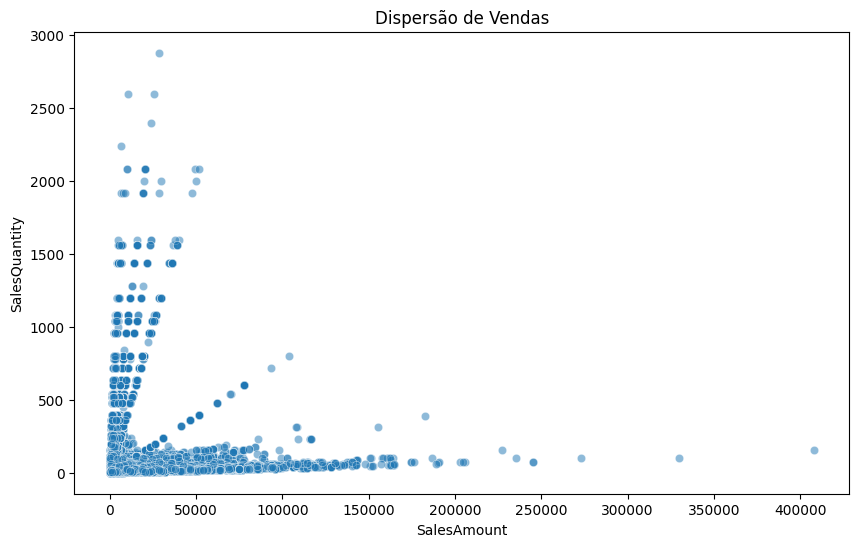

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Dispersão de Vendas')

sns.scatterplot(
        data=dados,
        x='SalesAmount',
        y='SalesQuantity',
        alpha=0.5
    )

plt.show()

Não há uma relação entre vendas em valor e vendas em quantidade

In [45]:
# funcao para boxplot
def plot_box_plot_chart(data, x, y):
    fig, ax = plt.subplots(figsize=(20, 6))
    fig.suptitle(f'{y} por {x}')

    ax = sns.boxplot(
                data=data,
                x=x,
                y=y
            )
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

In [46]:
x_columns = ['SaleYear', 'SalesTerritoryCountry', 'ChannelName', 'ProductCategoryName', 'ProductSubcategoryName', 'BrandName', 'ClassName', ]
y_columns = ['SalesAmount', 'SalesQuantity']

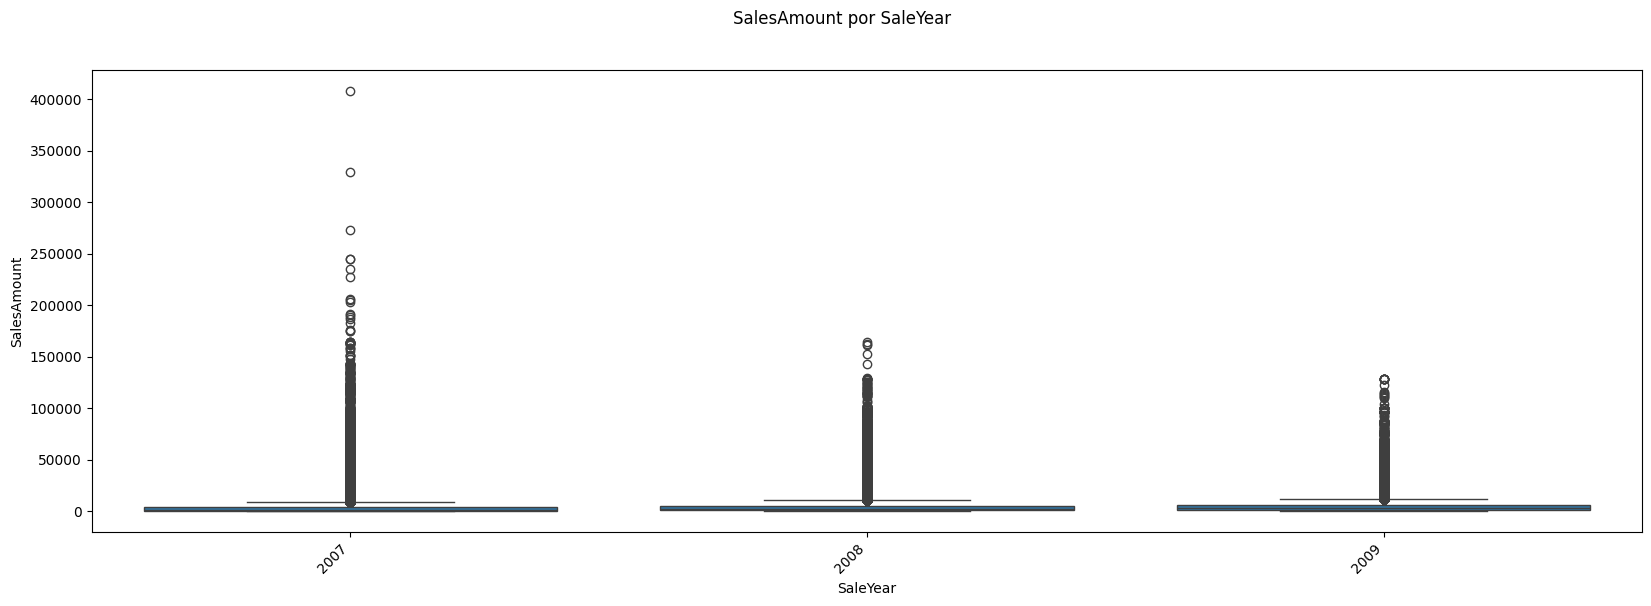

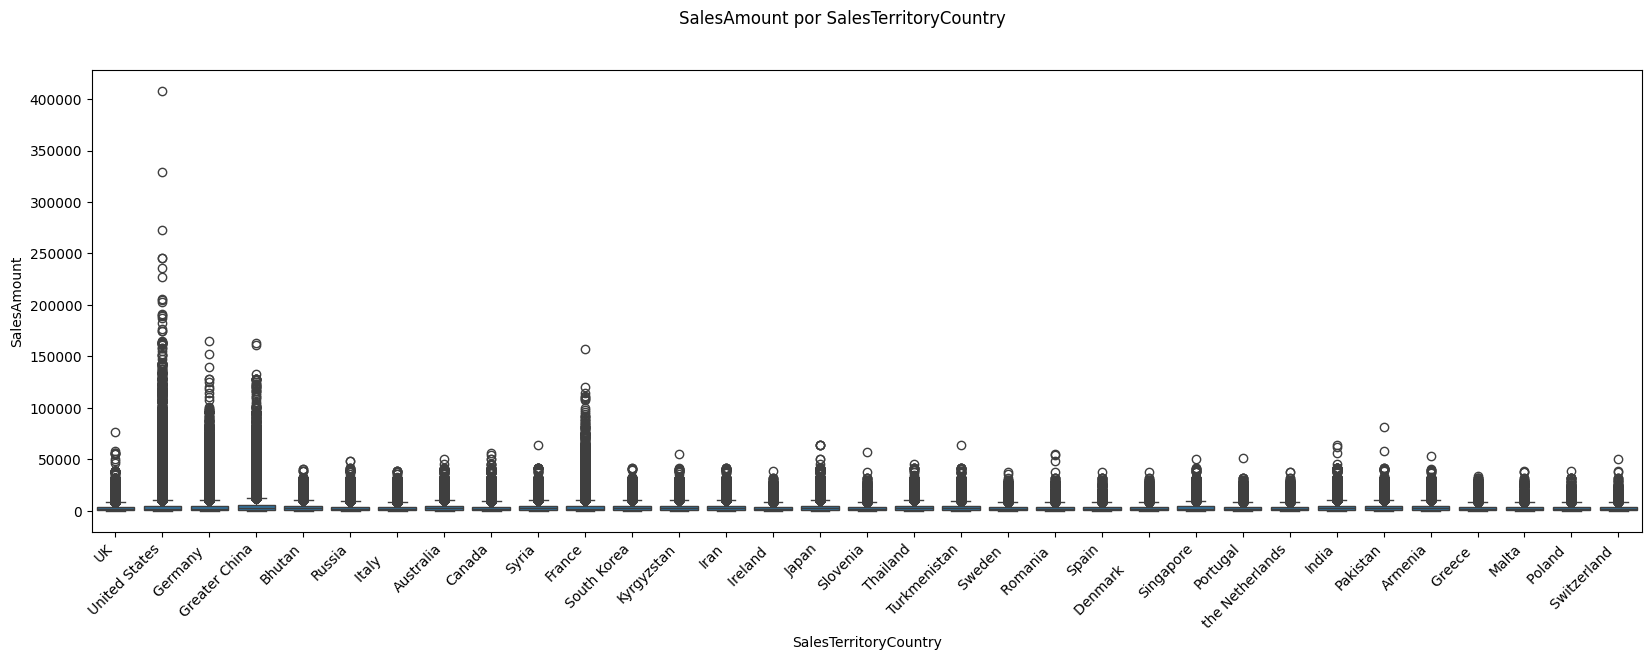

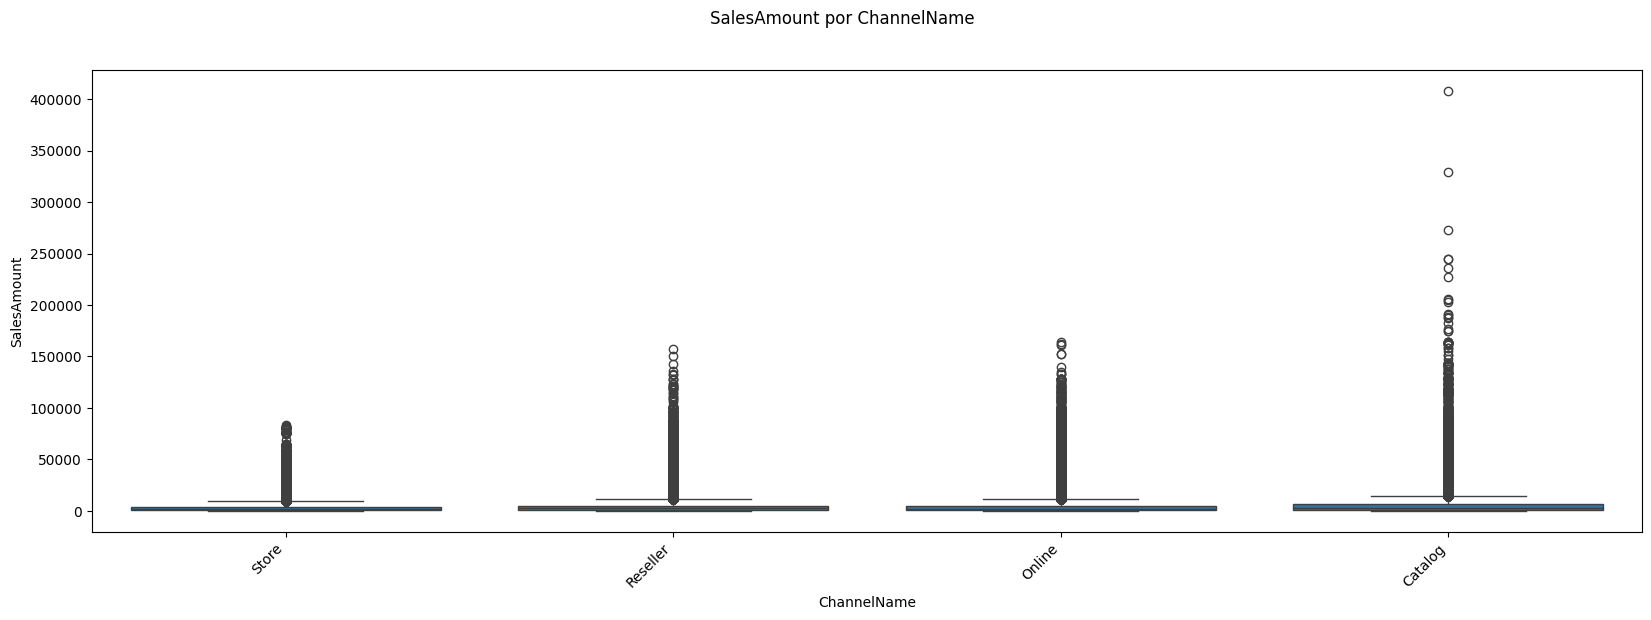

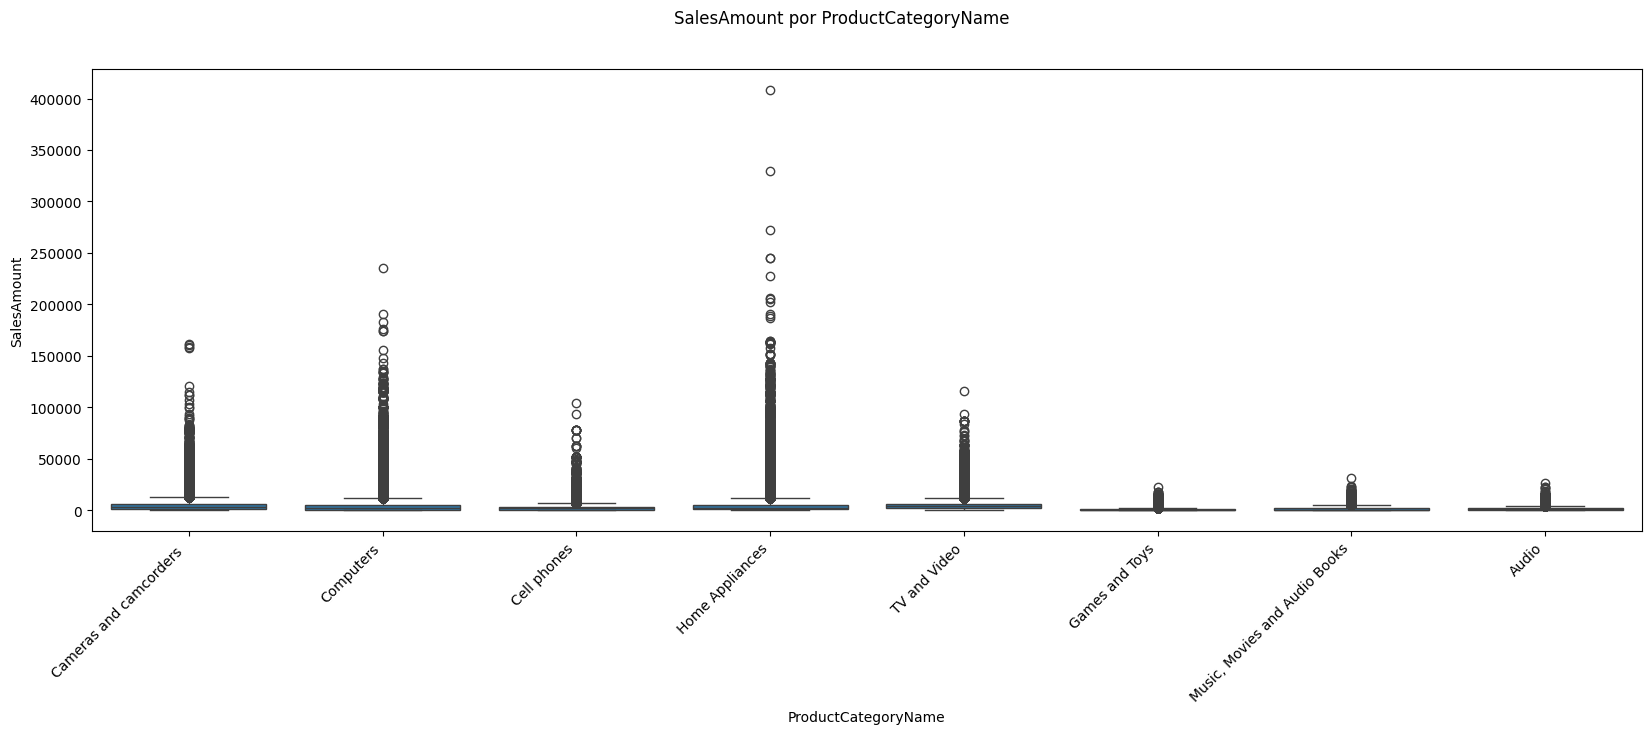

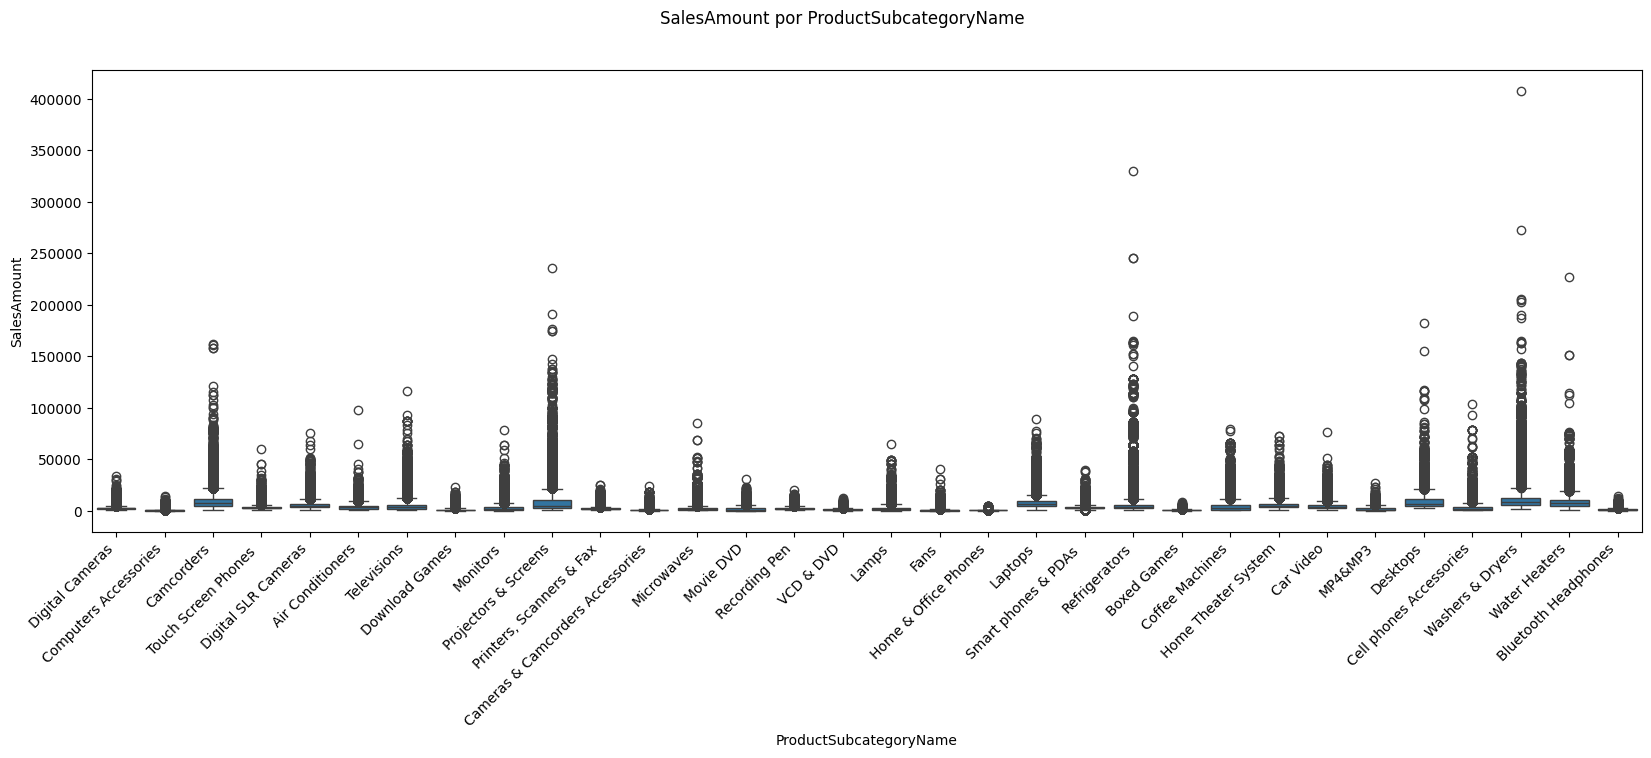

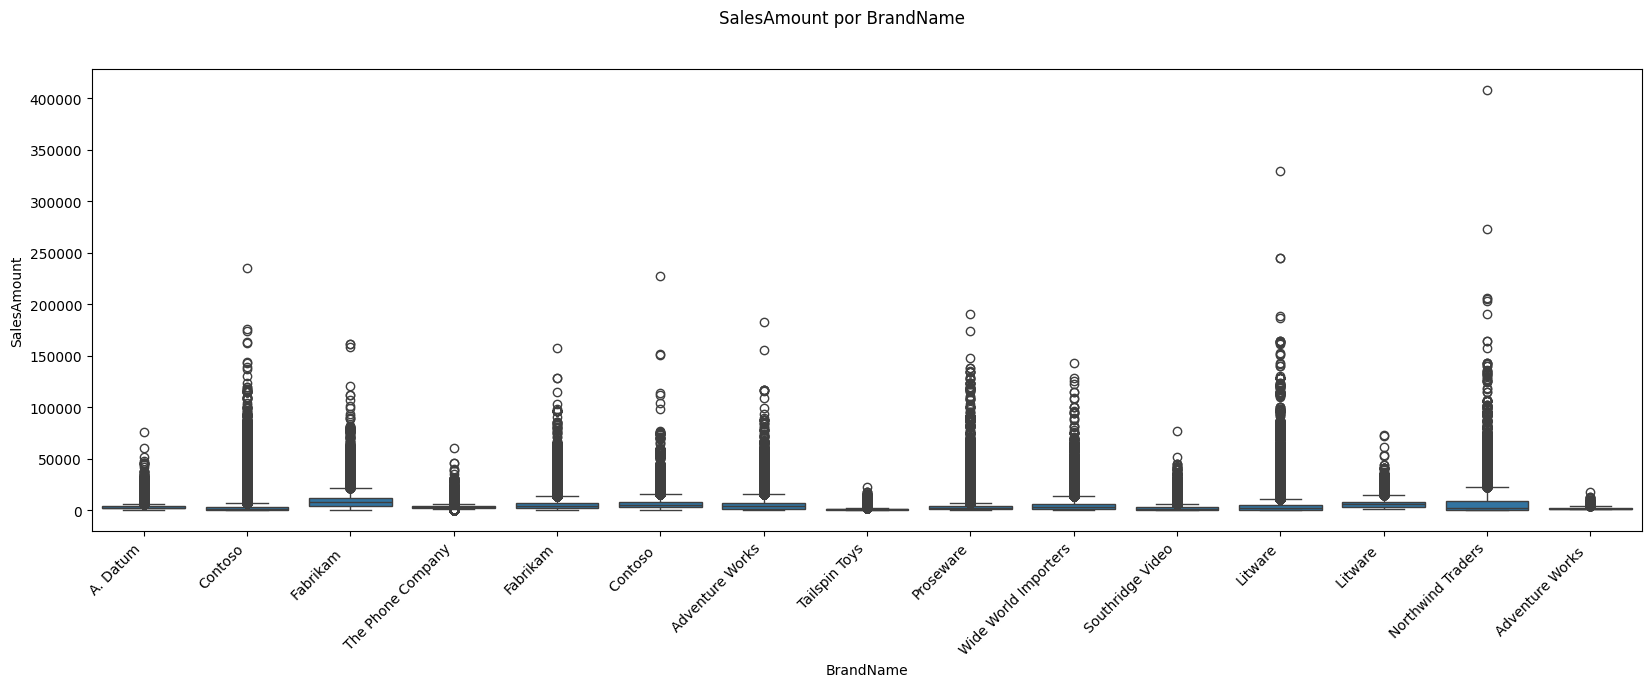

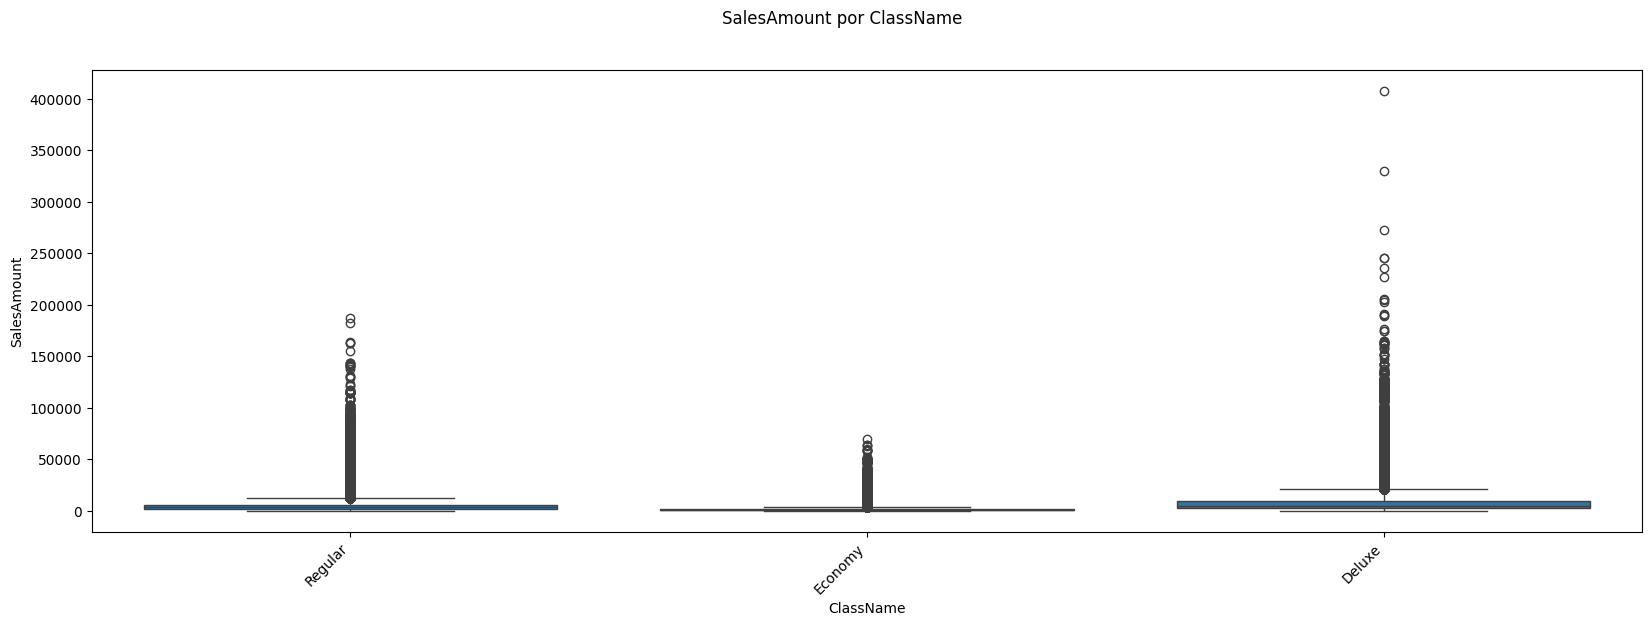

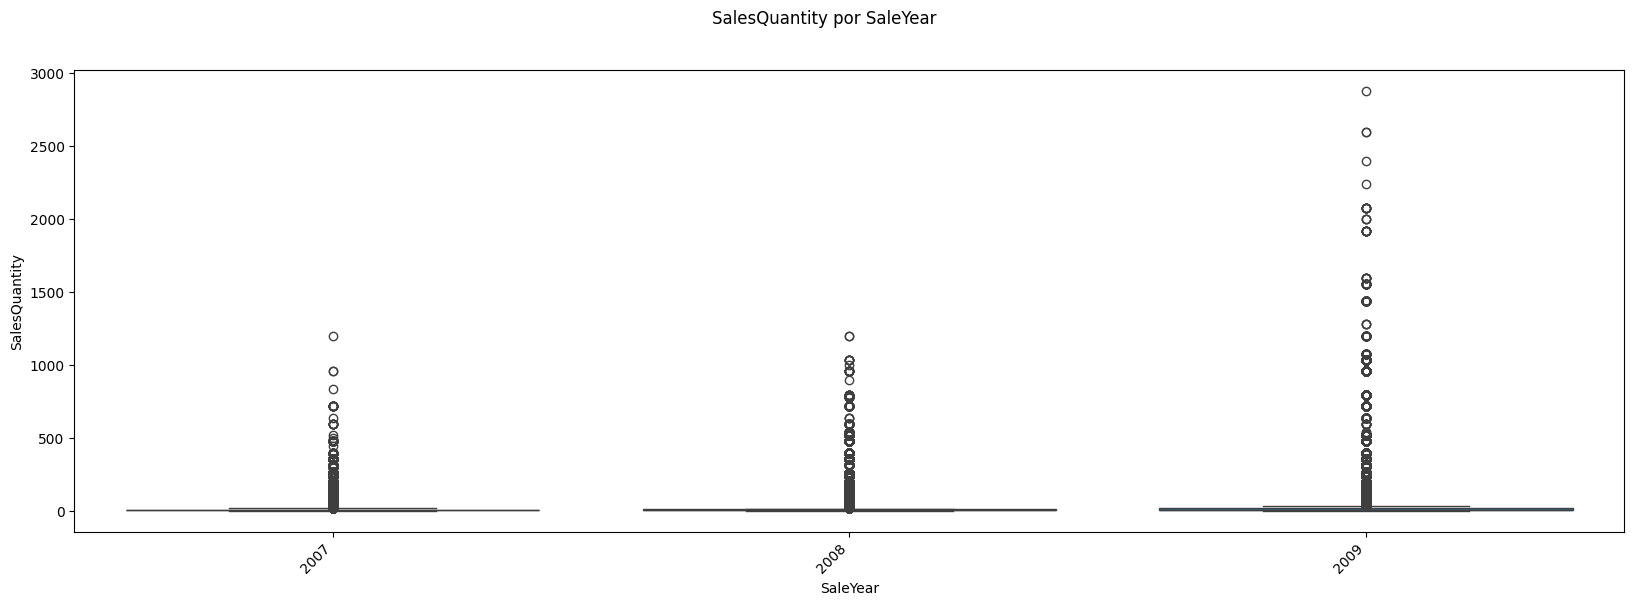

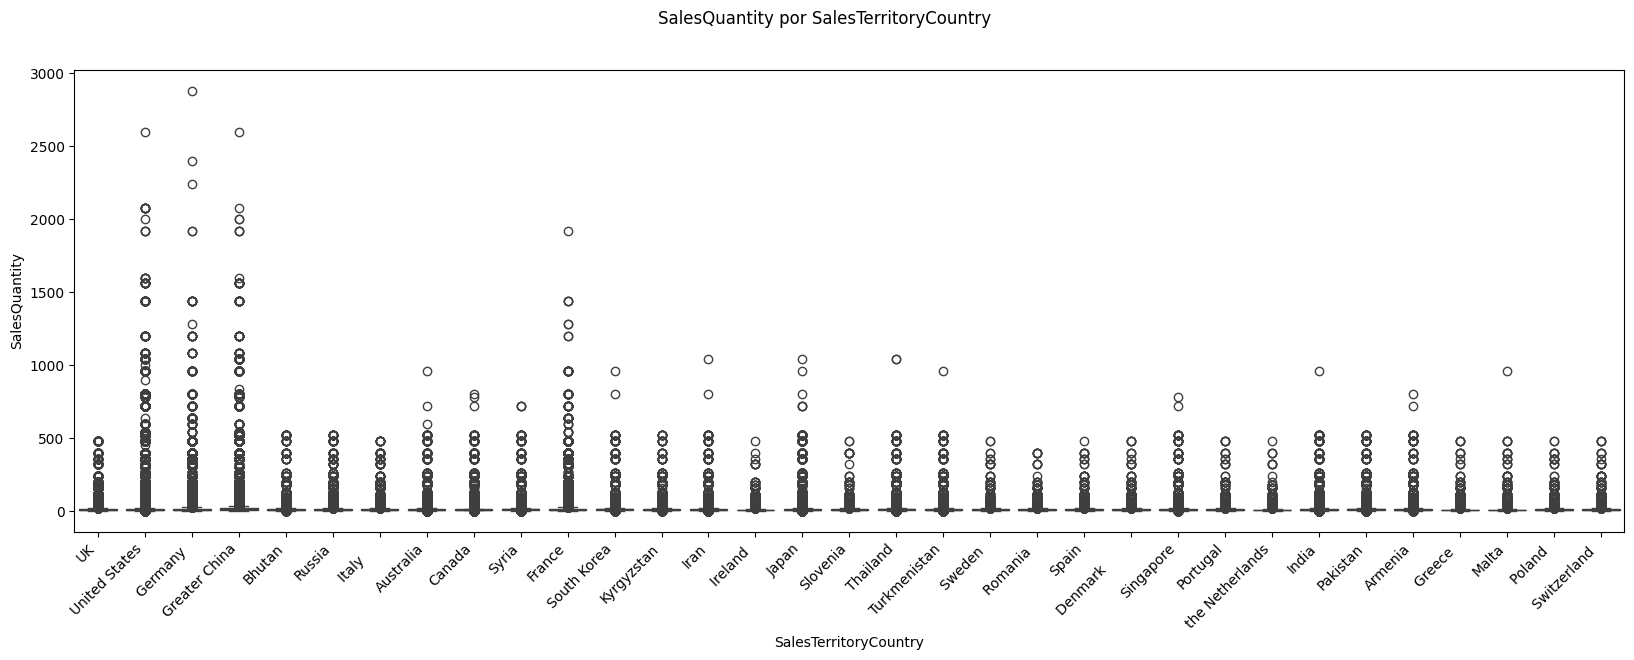

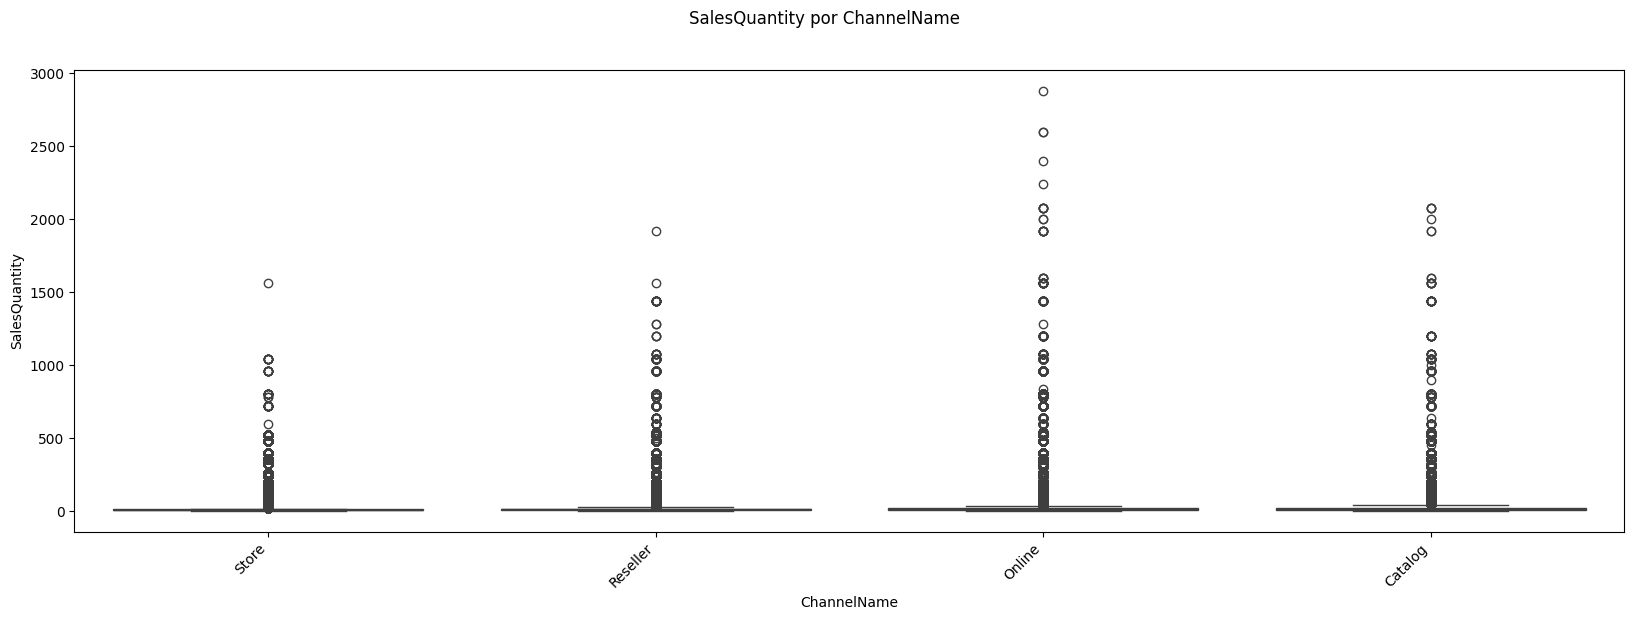

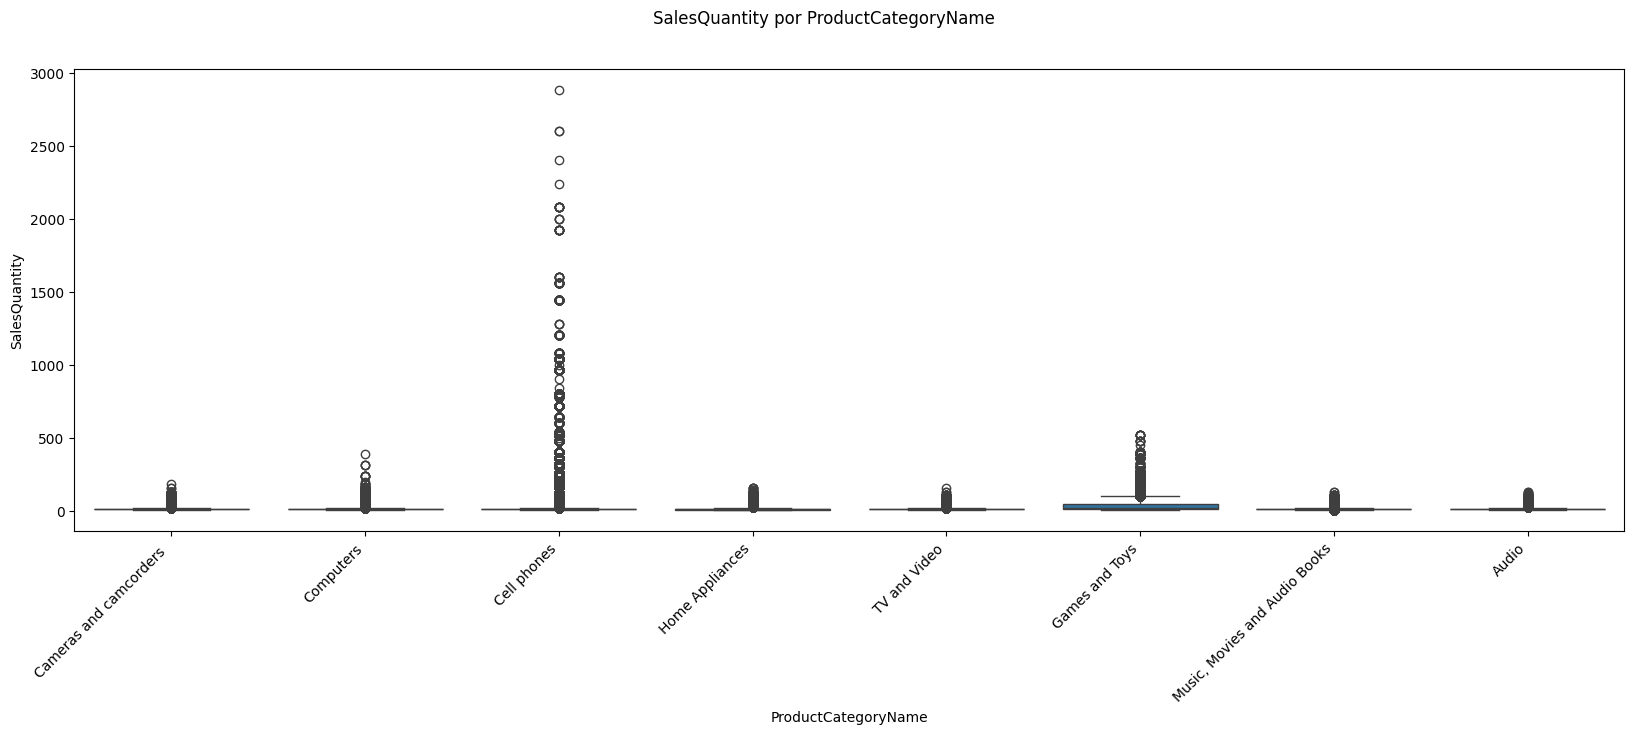

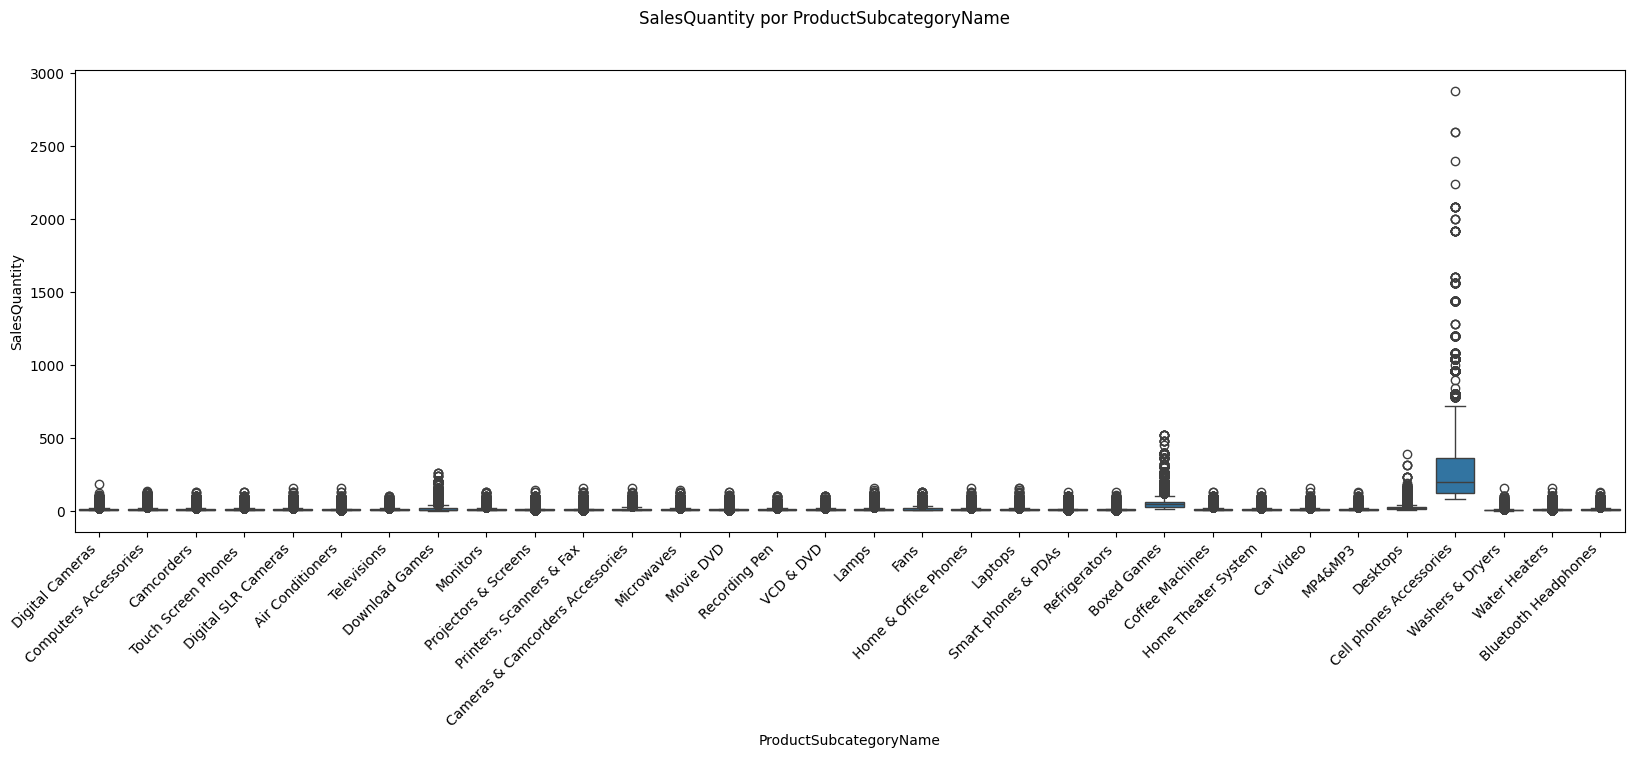

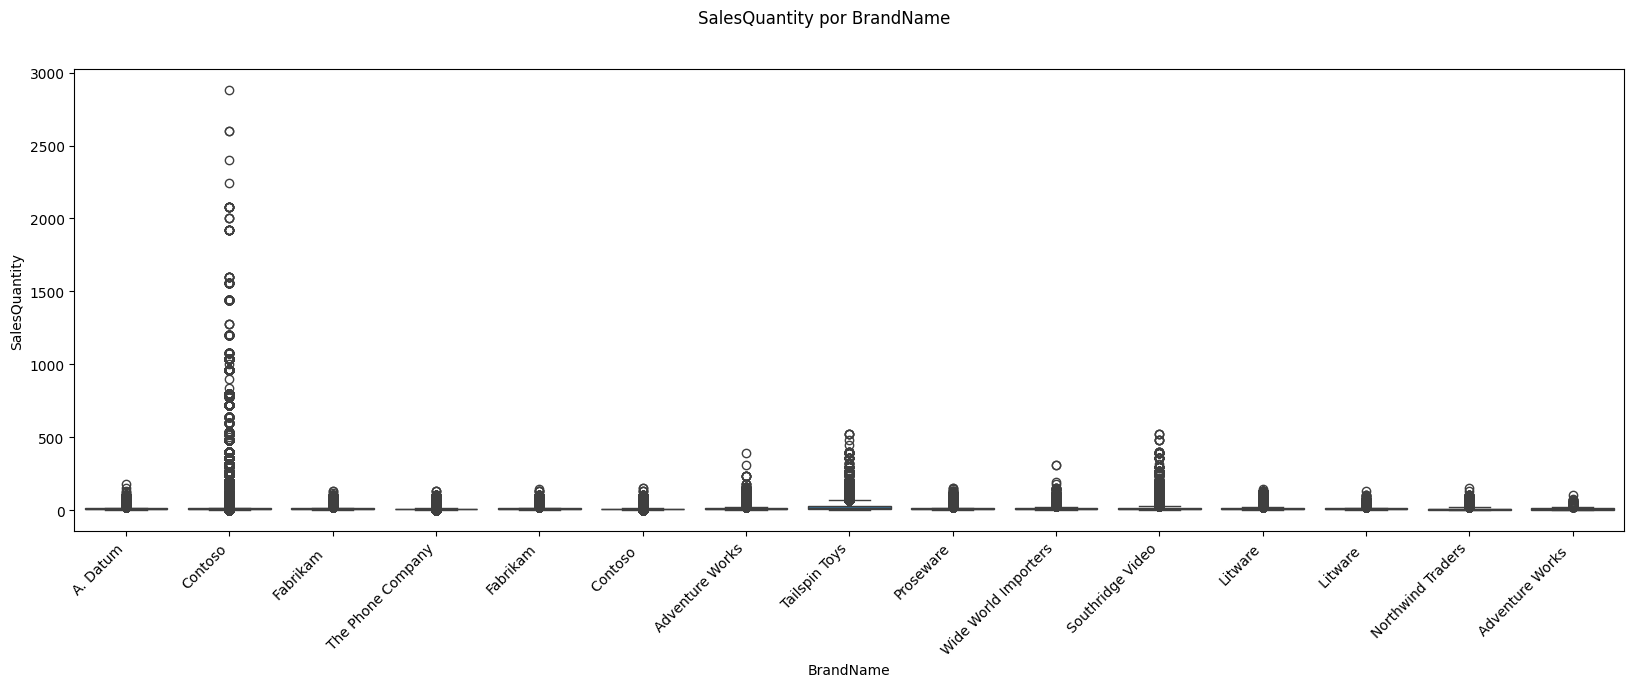

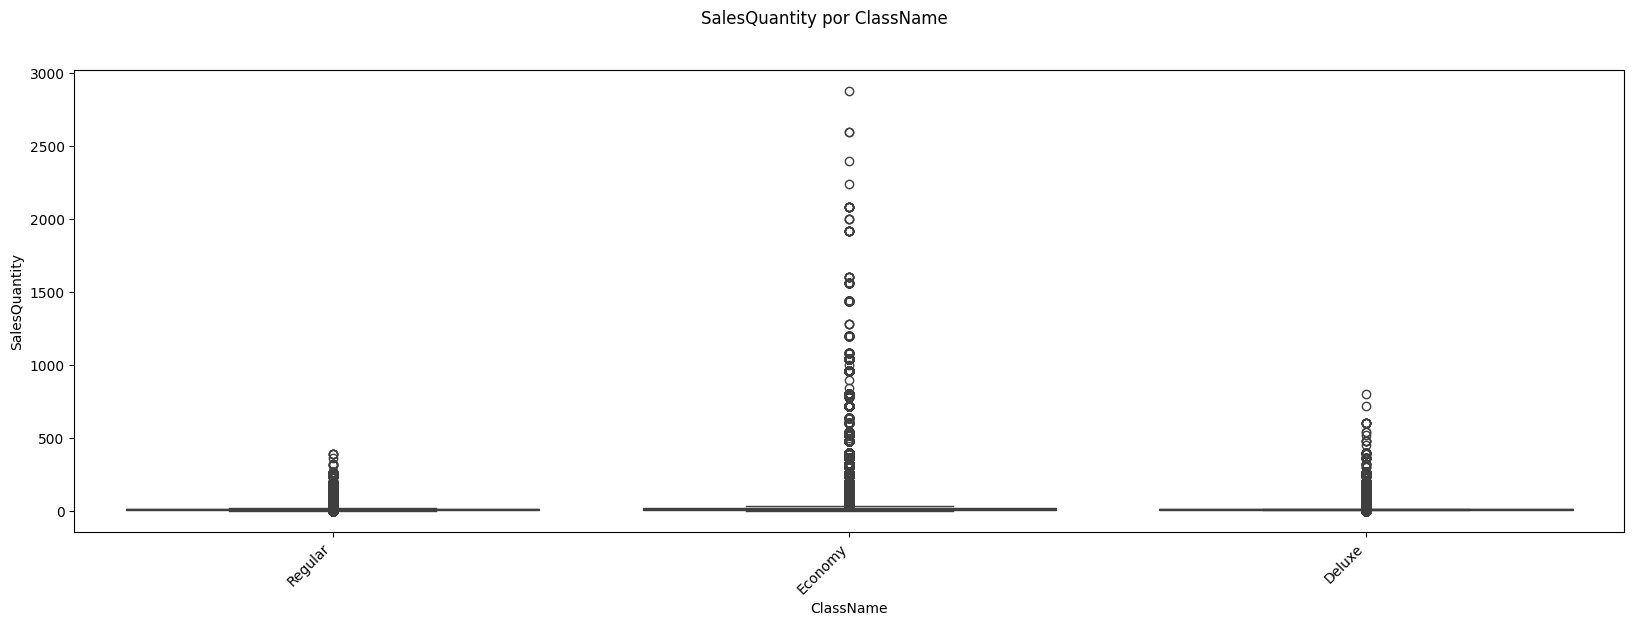

In [47]:
for y in y_columns:
    for x in x_columns:
        plot_box_plot_chart(dados, x, y)

Muitos outliers para a maioria das features, o que indica que existem preços de venda que distoam, quantidade de pedidos de diferentes tamanhos e mix de produtos grandes